In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 

sns.set_theme(style="whitegrid",context='talk', font_scale=1.2)
%matplotlib inline

In [2]:
import numpy as np

In [ ]:
r*(1 - X[0]/k) - c*X[1])*X[0],

In [23]:
def bac_growth(xt, r, k):
    return r*xt*(1 - xt/k)

In [34]:
x = [10]
for i in range(36):
    Δx = bac_growth(x[-1], 0.3, 1000)
    x.append(x[-1] + Δx)

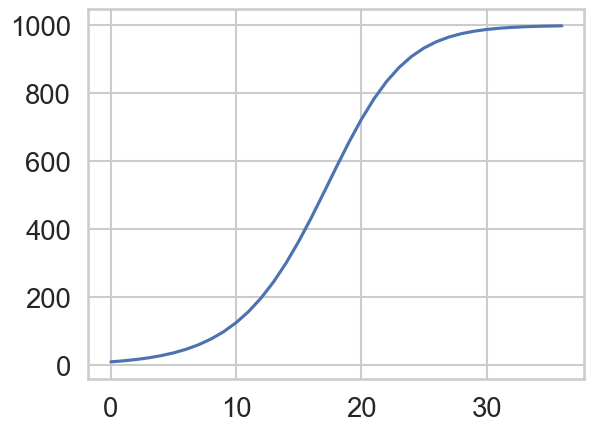

In [35]:
plt.plot(x)

In [3]:
from copy import deepcopy

In [4]:
class SAA(object):
    def __init__(self, init, prop, stoich):
        self.init_cond = deepcopy(init)
        self.prop = prop
        self.stoichiometry = stoich
        self.terminate=False
        
    @property
    def propensities(self):
        return [i(self.init_cond) for i in self.prop.values()]
    
    def execute_first_reaction(self):
        prop_list = self.propensities
        non_zeros = [i for i,j in enumerate(prop_list) if j > 0]
        if len(non_zeros) > 0:
            #print(non_zeros)
            # times = [(1/i)*np.log(1/np.random.uniform()) for i in prop_list]
            times = [(1/i)*np.log(1/np.random.uniform()) if i > 0 else np.inf for i in prop_list]
            next_reaction = np.argmin(times)
            #print(next_reaction)
            for i in self.init_cond.keys():
                if i != 'time':
                    self.init_cond[i].append(self.init_cond[i][-1] + self.stoichiometry[next_reaction][i])
                else:
                    self.init_cond[i].append(self.init_cond[i][-1] + times[next_reaction])
        else:
            self.terminate = True
                
    def simulate(self, step, verbose=False):
        for i in tqdm(range(step), disable= not verbose):
            while not self.terminate:
                self.execute_first_reaction()

In [357]:
# initial species counts and sojourn times
initital_conditions = {
    "s": [480],
    "i": [20],
    "r": [0],
    "time": [0.0],
}


# propensity functions
propensities = {
    0: lambda d: 2.0 * d["s"][-1] * d["i"][-1] / 500,
    1: lambda d: 1.0 * d["i"][-1],
}


# change in species for each propensity
stoichiometry = {
    0: {"s": -1, "i": 1, "r": 0},
    1: {"s": 0, "i": -1, "r": 1},
}

In [96]:
test = SAA(initital_conditions, propensities, stoichiometry)

In [97]:
test.simulate(2000, verbose=True)

100%|██████████| 2000/2000 [00:00<00:00, 167745.32it/s]


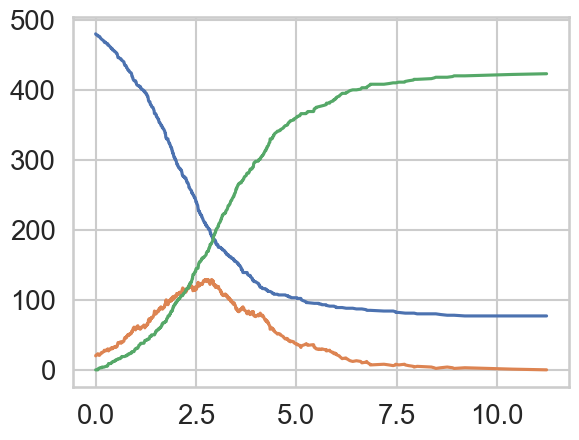

In [98]:
plt.plot(test.init_cond['time'], test.init_cond['s'])
plt.plot(test.init_cond['time'], test.init_cond['i'])
plt.plot(test.init_cond['time'], test.init_cond['r'])

In [65]:
# initial species counts and sojourn times
initital_conditions = {
    "bacteria" : [10],
    "E": [0],
    "J": [50],
    "A": [0],
    "dauer" : [0],
    "dauer_mig" : [0],
    "Dead" : [0],
    "time": [0.0]
}

a = 1000
# propensity functions
propensities = {
    0: lambda d: 1.0 * d["bacteria"][-1],
    1: lambda d: 0.5 * d["E"][-1]*d["bacteria"][-1]/(a),
    2: lambda d: 0.5 * d["J"][-1]*d["bacteria"][-1]/(a),
    3: lambda d: 1.0 * d["A"][-1]*d["bacteria"][-1]/(a),
    4: lambda d: 0.1 * d["E"][-1]*1/(d["bacteria"][-1]/(a) + 1),
    5: lambda d: 0.1 * d["J"][-1]*1/(d["bacteria"][-1]/(a) + 1),
    6: lambda d: 0.1 * d["A"][-1]*1/(d["bacteria"][-1]/(a) + 1),
    7: lambda d: 0.05,
    8: lambda d: 0.1 * d["J"][-1]*1/(d["bacteria"][-1]/(a) + 1),
    9: lambda d: 0.05 * d["dauer"][-1],
    10: lambda d: 0.1 * d["dauer"][-1]*d["bacteria"][-1]/(a)
}
#     8: lambda d: 0.1 * d["J"][-1] if d["bacteria"][-1] < 10 else 0.0,
# }


# change in species for each propensity
stoichiometry = {
    0: {"bacteria": +1, "E": 0, "J": 0, "A": 0, "dauer":0, "dauer_mig":0, "Dead":0},
    1: {"bacteria": -2, "E": -1, "J": 1, "A": 0,"dauer":0, "dauer_mig":0, "Dead":0},
    2: {"bacteria": -4, "E": 0, "J": -1, "A": 1,"dauer":0, "dauer_mig":0, "Dead":0},
    3: {"bacteria": -1, "E": 2, "J": 0, "A": 0, "dauer":0, "dauer_mig":0, "Dead":0},
    4: {"bacteria": 0, "E": -1, "J": 0, "A": 0, "dauer":0, "dauer_mig":0, "Dead":1},
    5: {"bacteria": 0, "E": 0, "J": -1, "A": 0, "dauer":0, "dauer_mig":0, "Dead":1},
    6: {"bacteria": 0, "E": 0, "J": 0, "A": -1, "dauer":0, "dauer_mig":0, "Dead":1},
    7: {"bacteria": +1, "E": 0, "J": 0, "A": 0, "dauer":0, "dauer_mig":0, "Dead":1},
    8: {"bacteria": 0, "E": 0, "J": -1, "A": 0, "dauer":+1, "dauer_mig":0, "Dead":1},
    9:  {"bacteria": 0, "E": 0, "J": 0, "A": 0, "dauer":-1, "dauer_mig":+1, "Dead":1},
    10: {"bacteria": 0, "E": 0, "J": 0, "A": +1, "dauer":-1, "dauer_mig":0, "Dead":1}
}

In [69]:
test = SAA(initital_conditions, propensities, stoichiometry)

In [70]:
for i in range(int(1e5)):
    test.execute_first_reaction()

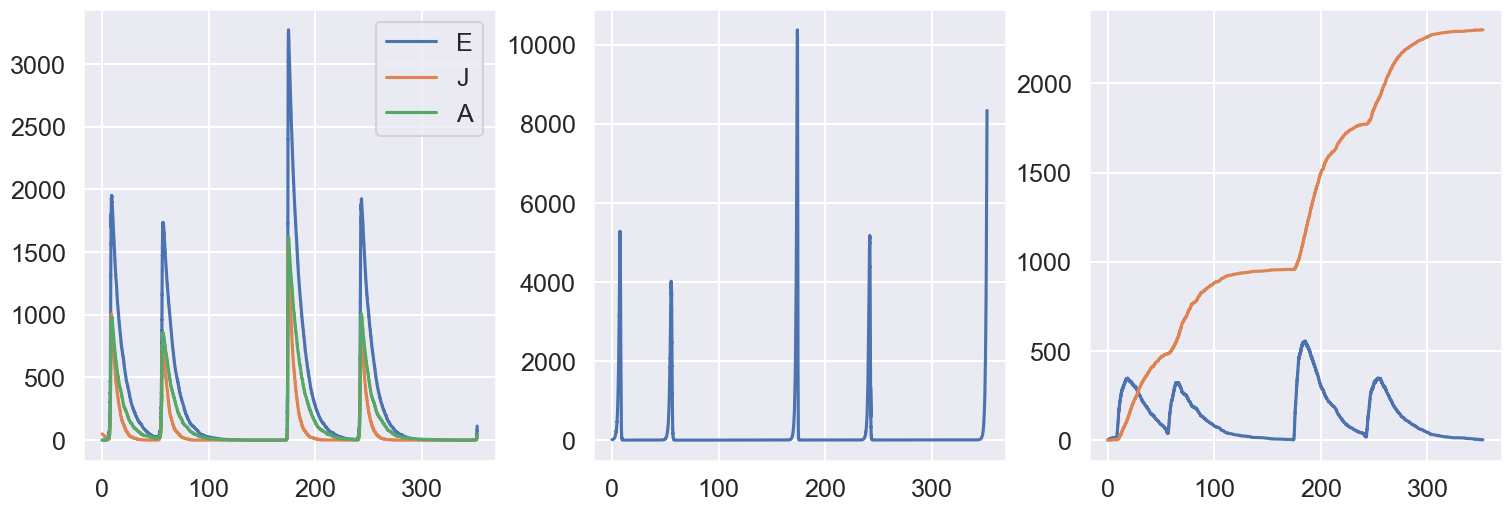

In [71]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15, 5),constrained_layout=True)

axes = axes.flatten()

for i in ['E', 'J', 'A']:
    axes[0].plot(test.init_cond['time'], test.init_cond[i], label=i)

axes[1].plot(test.init_cond['time'], np.array(test.init_cond['bacteria']))

axes[2].plot(test.init_cond['time'], np.array(test.init_cond['dauer']))
axes[2].plot(test.init_cond['time'], np.array(test.init_cond['dauer_mig']))

# axes[0].set_yscale('log')

axes[0].legend()

In [51]:
data = {}
for i in tqdm(range(50)):
    test = SAA(initital_conditions, propensities, stoichiometry)
    for j in range(int(1e5)):
        test.execute_first_reaction()
    data[i] = test.init_cond

100%|██████████| 50/50 [02:48<00:00,  3.36s/it]


In [36]:
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)

/Users/akalirad/anaconda3/envs/current_alt/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


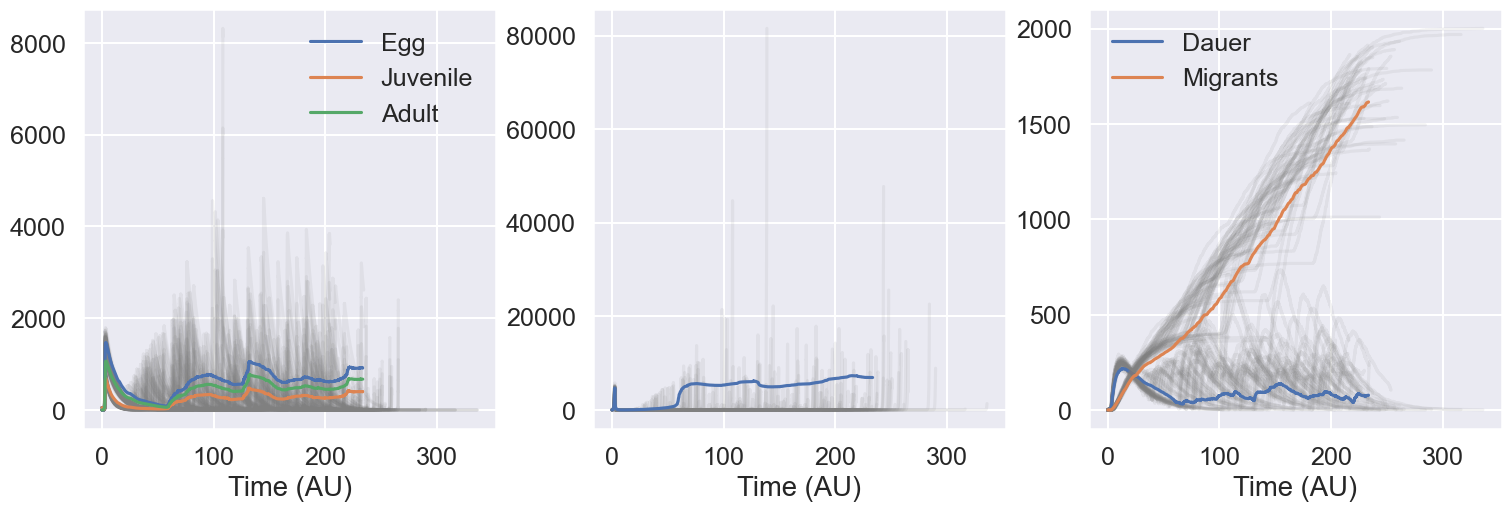

In [52]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15, 5),constrained_layout=True)

axes = axes.flatten()

time = np.mean([j['time'] for j in data.values()], axis=0)
for j in data.values():
    for i in ['E', 'J', 'A']:
        axes[0].plot(j['time'], j[i], color='gray', alpha=0.1)
for i,j in zip(['E', 'J', 'A'], ['Egg', 'Juvenile', 'Adult']):
    axes[0].plot(time, np.mean([j[i] for j in data.values()], axis=0), label=j)
        

for j in data.values():
    axes[1].plot(j['time'], np.array(j['bacteria']), color='gray', alpha=0.1)
axes[1].plot(time, np.mean([j['bacteria'] for j in data.values()], axis=0), label=i)


for j in data.values():
    axes[2].plot(j['time'], np.array(j['dauer']), color='gray', alpha=0.1)
axes[2].plot(time, np.mean([j['dauer'] for j in data.values()], axis=0), label='Dauer')


for j in data.values():
    axes[2].plot(j['time'], np.array(j['dauer_mig']), color='gray', alpha=0.1)
axes[2].plot(time, np.mean([j['dauer_mig'] for j in data.values()], axis=0), label='Migrants')


axes[0].legend(frameon=False)

axes[2].legend(frameon=False)

for i in axes:
    i.set_xlabel('Time (AU)')